In [2]:
libname SASBA '/folders/myfolders/SASBA/SASBA_DATA';

## Chapter 5: Analysis of Categorical Variables

Testing the independence of Diabetes Status and Renal Disease
13.24% have renal disease, whereasfor those patients is controlled, 3.13 percent

Ho: two categorical vars are independent (vars not related)
Ha: two categorical vars are not independent




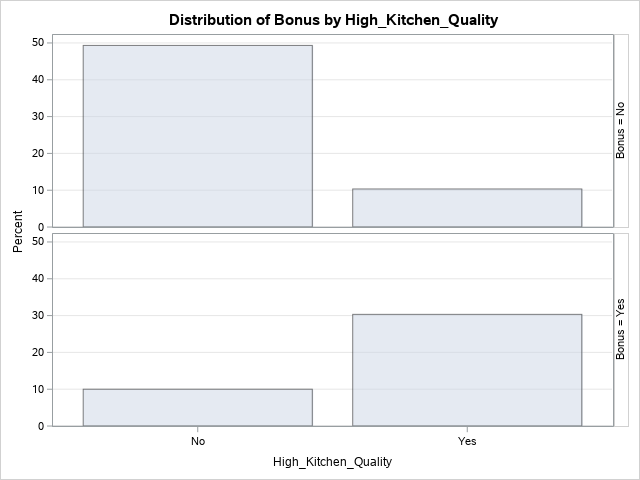

In [3]:
/* Program 5.1 Association Between Bonus and Kitchen Quality */
data ames; 
   set SASBA.ames300;
run;
proc format;
   value Quality 0=No 1=Yes;
   value YesNo 0=No 1=Yes;
run;

proc freq data=ames; 
   tables Bonus*High_Kitchen_Quality
   /chisq relrisk expected plots=freqplot(scale=percent);
   format Bonus YesNo. High_Kitchen_Quality Quality.;
   title 'Test of Independence for Bonus and Kitchen Quality';
run;

# 5.1 Interpretation
    Test Association between Kitchen Quality and Bonus
    Overall 59.3% not high quality, %40.67% high quality kitchen
    122 homes kitchen hiqh quality: 74.59% received bonus; 25.41% no bonus
    178 homes kitchen not high quality: 16.95% received bonus; 83.15% no bonus
    appears bonus status depends on kitchen quality
    expected frequenceis must be greater than 5 - if not Fisher's Exact Test must be used
# 5.1 Results    
    Reject null hypothesis, there is evidence that bonus and kitchen quality are dependent in the population
 

## Chapter 5.2 Measuring Strength of Association between Two Categorical Variables

# Cramer's V
    v=sqrt(X2/n(k-1)); 0 = no association 1=perfect association
    in our example, 0.5005
# Odds Ratio
    odds of Yes for Group 1 = prob(a)/prob(c) = [a/(a+c)]/[c/(a+c)]=a/c
    odds of No for Group 2= prob(b)/prob(d)= [b/(b+d)]/[d/(b+d)]=b/d
    Odds Ratio(Yes)=[a/c]/[b/d]=[ad/bc]
    odds of the event in Group 1 divided by the odds of event for Group 2
    Odds Ratio 14.4817, therefore, when kitchen quality is rated as high si 14.5 times the odds of earning of bonus when kitchen quality is not rated as high
    test of independence is equivalent to testing that population odds ratio = 1.0

# Using chi-square Tests for Exploration Prior to Predictive Analytics
    chi-square test of independence can be used to assess variable importance
    
Ho: Bonus and Corner Lot are independent
Ha: Bonus and Corner Lot are not independent


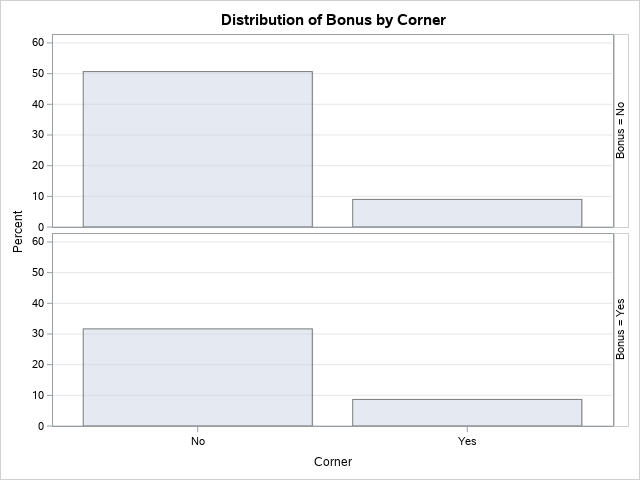

In [4]:
/* Program 5.2 */
data ames; 
   set SASBA.ames300;
      Corner=0; 
        if Lot_Config='' then Corner=.;
        if Lot_Config='Corner' then Corner=1;
run;

proc format;
   value Quality 0=No 1=Yes;
   value YesNo 0=No 1=Yes;
run;

proc freq data=ames; 
   tables Bonus*Corner
   /chisq relrisk expected plots=freqplot(scale=percent);
   format Bonus Corner YesNo.;
   title 'Test of Independence for Bonus and Corner Lot';
run;

# 5.2 Testing Association between Bonus and Corner Lot
    p-value .1537 do not reject null; there is no evidence that bonus is associated with home being on a corner lot
    Cramer's V strength association is .0824, attributed only to chance
    if odds ratio contains 1 which means there is no evidence that odd-ratio differs from 1.0
    
    use results of chi-square tests for ordering the predictor variables by importance using the variable worth
        Worth=-2log(p)
        for kitchen quality the worth is 45.75, corner lot worth is 1.63